<a href="https://colab.research.google.com/github/TheGreatWaves/C-base/blob/main/Project_2_Non_DL_Speech_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np
from numpy import ndarray
import pandas as pd

import librosa

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
from tqdm import tqdm

import glob

In [2]:
librosa.__version__

'0.10.1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Assumptions:
# - The transcription file is located in the same directory as the audio files.
class AudioDataset:
  """
  Class for loading and storing audio data.
  """

  def __init__(self):
    self.df = pd.DataFrame(columns=['id', 'path', 'transcription'])

  def load_transcriptions(self, directory_path: str) -> bool:
    """
    Load all transcriptions from a given directory, including subdirectories.
    Returns False if no transcription files were found, or if any failed to load.
    """
    transcriptions_path = glob.glob(
        f"{directory_path}/**/*.trans.txt",
        recursive=True
    )

    if len(transcriptions_path) == 0:
      return False

    for path in transcriptions_path:
      if not self.load_transcription_file(path):
        return False

    return True

  def load_transcription_file(self, file_path: str) -> bool:
    """
    Parse transcription file and records the audio ID - subtitle mapping.
    Returns False if the file could not be read.
    """
    with open(file_path, "r") as file:
      file_directory = os.path.dirname(file_path)
      lines = file.read().split("\n")
      for line in lines:
        splitter = line.split(" ")
        file_name = splitter[0]
        file_content = ' '.join(splitter[1:])
        self.df.loc[len(self.df)] = {
            'id':file_name,
            'transcription':file_content,
            'path': f'{file_directory}/{file_name}.flac'
        }
      return True
    return False

  def keys(self):
    return iter(self.df['id'])

  def get(self, id: int):
    """
    Retrieve a dataframe row from ID.
    """
    return self.df.loc[self.df['id'] == id]

In [5]:
ds = AudioDataset()

In [6]:
ds.load_transcriptions("/content/drive/MyDrive/datasets")

True

### Extracting Features

In [13]:
from librosa.feature import mfcc
import librosa
audio, sampling_freq = librosa.load(ds.df.head()['path'].values[0])
mfcc_features = librosa.feature.mfcc(sr=sampling_freq, y=audio)
print('\nNumber of windows =', mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])


Number of windows = 20
Length of each feature = 85


Text(0.5, 1.0, 'MFCC')

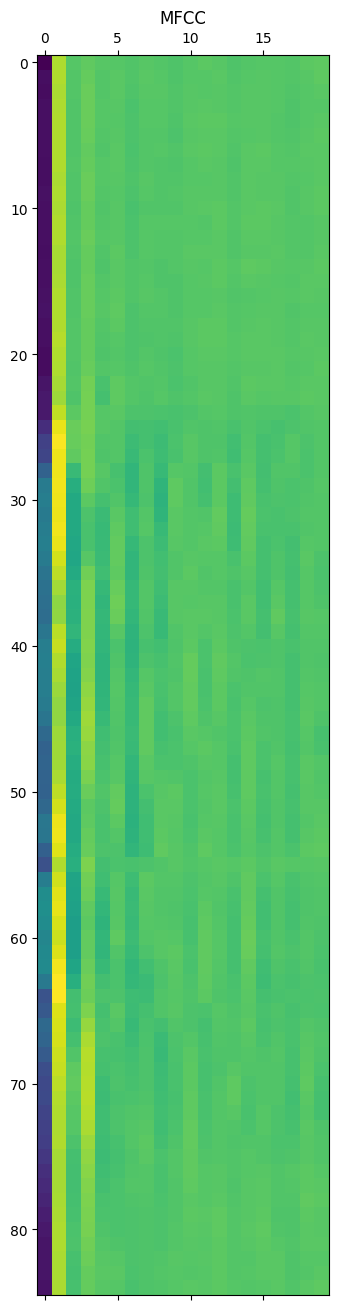

In [14]:
mfcc_features = mfcc_features.T
plt.matshow(mfcc_features)
plt.title('MFCC')